In [1]:
import cv2
import os
data_path = '/content/drive/MyDrive/dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [3]:
img_size = 100
data = []
target = []

for category in categories:
  folder_path = os.path.join(data_path,category)
  img_names = os.listdir(folder_path)

  for img_name in img_names:
    img_path = os.path.join(folder_path,img_name)
    img = cv2.imread(img_path)

    try:

      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert from color to gray          
      resized=cv2.resize(gray,(img_size,img_size)) #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset 
      data.append(resized)#appending the image and the label(categorized) into the list (dataset)
      target.append(label_dict[category])

    except Exception as e:
            print('Exception:',e)

      

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [5]:
import numpy as np
data = np.array(data)/225.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

np.save('data',data)
np.save('target',new_target)

In [6]:
data=np.load('data.npy')
target=np.load('target.npy')

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7492 - accuracy: 0.5334

31/31 [==============================] - 82s 3s/step - loss: 0.7492 - accuracy: 0.5334 - val_loss: 0.7671 - val_accuracy: 0.4435
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.5658

31/31 [==============================] - 77s 2s/step - loss: 0.6736 - accuracy: 0.5658 - val_loss: 0.6177 - val_accuracy: 0.6694
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.5512 - accuracy: 0.7419

31/31 [==============================] - 89s 3s/step - loss: 0.5512 - accuracy: 0.7419 - val_loss: 0.5175 - val_accuracy: 0.7702
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.3610 - accuracy: 0.8431

31/31 [==============================] - 77s 2s/step - loss: 0.3610 - accuracy: 0.8431 - val_loss: 0.3662 - val_accuracy: 0.8306
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.9069

31/31 [==============================] - 77s 3s/step - loss: 0.2402 - accuracy: 0.9069 - val_loss: 0.3595 - val_accuracy: 0.8468
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.2132 - accuracy: 0.9211

31/31 [==============================] - 85s 3s/step - loss: 0.2132 - accuracy: 0.9211 - val_loss: 0.2212 - val_accuracy: 0.9073
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9383

31/31 [==============================] - 77s 2s/step - loss: 0.1482 - accuracy: 0.9383 - val_loss: 0.1993 - val_accuracy: 0.9194
Epoch 8/20
31/31 [==============================] - ETA: 0s - loss: 0.1064 - accuracy: 0.9656

31/31 [==============================] - 78s 3s/step - loss: 0.1064 - accuracy: 0.9656 - val_loss: 0.1807 - val_accuracy: 0.9315
Epoch 9/20
31/31 [==============================] - 83s 3s/step - loss: 0.0843 - accuracy: 0.9656 - val_loss: 0.1845 - val_accuracy: 0.9194
Epoch 10/20
31/31 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9747

31/31 [==============================] - 79s 3s/step - loss: 0.0707 - accuracy: 0.9747 - val_loss: 0.1578 - val_accuracy: 0.9556
Epoch 11/20
31/31 [==============================] - 76s 2s/step - loss: 0.0646 - accuracy: 0.9828 - val_loss: 0.1622 - val_accuracy: 0.9476
Epoch 12/20
31/31 [==============================] - 84s 3s/step - loss: 0.0661 - accuracy: 0.9798 - val_loss: 0.1792 - val_accuracy: 0.9274
Epoch 13/20
31/31 [==============================] - 76s 2s/step - loss: 0.0547 - accuracy: 0.9808 - val_loss: 0.2089 - val_accuracy: 0.9435
Epoch 14/20
31/31 [==============================] - 76s 2s/step - loss: 0.0414 - accuracy: 0.9868 - val_loss: 0.1880 - val_accuracy: 0.9556
Epoch 15/20
31/31 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9899

31/31 [==============================] - 85s 3s/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.1273 - val_accuracy: 0.9556
Epoch 16/20
31/31 [==============================] - 76s 2s/step - loss: 0.0341 - accuracy: 0.9919 - val_loss: 0.1760 - val_accuracy: 0.9476
Epoch 17/20
31/31 [==============================] - 75s 2s/step - loss: 0.0355 - accuracy: 0.9848 - val_loss: 0.1500 - val_accuracy: 0.9395
Epoch 18/20
31/31 [==============================] - 87s 3s/step - loss: 0.0491 - accuracy: 0.9838 - val_loss: 0.2486 - val_accuracy: 0.9274
Epoch 19/20
31/31 [==============================] - 76s 2s/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.2244 - val_accuracy: 0.9355
Epoch 20/20
31/31 [==============================] - 75s 2s/step - loss: 0.0255 - accuracy: 0.9939 - val_loss: 0.1525 - val_accuracy: 0.9476


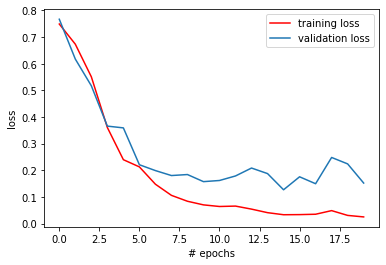

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

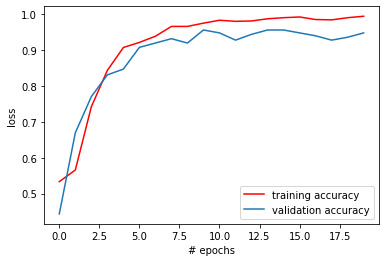

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 530ms/step - loss: 0.2417 - accuracy: 0.9493
[0.24167881906032562, 0.9492753744125366]


In [26]:
face_clsfr = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}


In [47]:
from google.colab.patches import cv2_imshow

def predict(image):
  img = cv2.imread(image)
  img = cv2.resize(img,(800,700)) # (400,800), (800,700)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces=face_clsfr.detectMultiScale(gray,1.3,5)  

  for (x,y,w,h) in faces:
    
    face_img=gray[y:y+w,x:x+w]
    resized=cv2.resize(face_img,(100,100))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1)) #reshape to 4D
    result=model.predict(reshaped)

    label=np.argmax(result,axis=1)[0] #to determine which has the maximum probability
      
    cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2) #for bounding box
    cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1) #for closed or filled rectangle on top of bounding box
    cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2) # text to be displayed
        
  print(label)       
  cv2_imshow(img)
  key=cv2.waitKey(1)
  
  
        


1/1 [==============================] - 0s 42ms/step
1


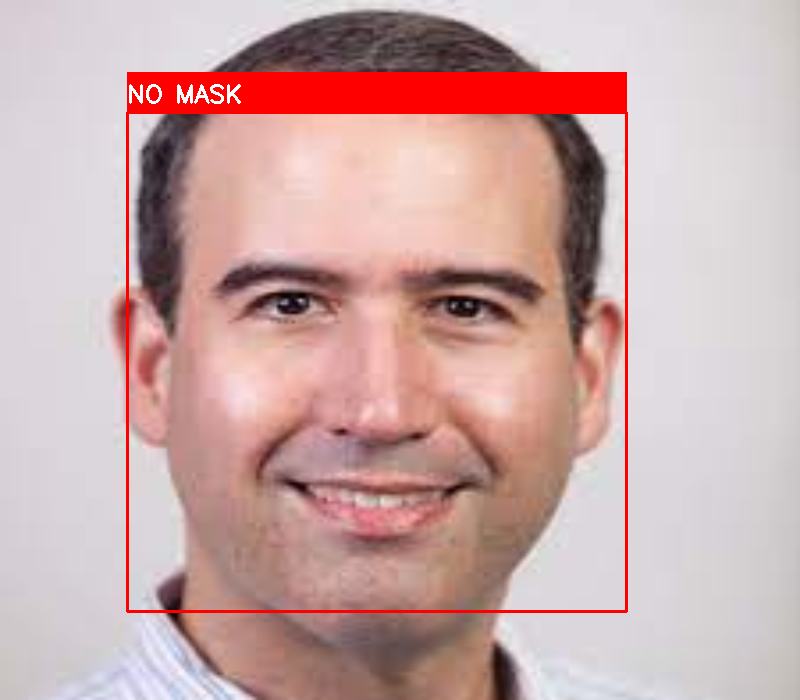

In [49]:
predict("/content/withoutmaskpic.jpg")

In [50]:
!zip -r CNN_Mask_Detection.zip /content/model-015.model

  adding: content/model-015.model/ (stored 0%)
  adding: content/model-015.model/keras_metadata.pb (deflated 90%)
  adding: content/model-015.model/assets/ (stored 0%)
  adding: content/model-015.model/saved_model.pb (deflated 88%)
  adding: content/model-015.model/variables/ (stored 0%)
  adding: content/model-015.model/variables/variables.index (deflated 63%)
  adding: content/model-015.model/variables/variables.data-00000-of-00001 (deflated 14%)
